In [25]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import codecs

In [26]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah

In [27]:
df.shape

(115318, 135)

In [28]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [29]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [18]:
df.isnull().sum()

Year              1
Month             1
Day               1
Country           1
Region            1
City            153
latitude       4022
longitude      4023
AttackType        1
Killed         6472
Wounded        9668
Casualities    9956
Target          602
Group             1
Target_type       1
Weapon_type       1
dtype: int64

In [30]:
print(f"""
    There are {df.Country.nunique()} countries from {df.Region.nunique()} regions covered in the dataset and terrorist atacks data in {df.Year.nunique()}
    years from {df.Year.min()} to {df.Year.max()}. Overally {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.Casualities.sum())} casualities
    consisted of {int(df.Killed.sum())} kills and {int(df.Wounded.sum())} wounded.
""")


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 43
    years from 1970 to 2013. Overally 115318 terrorist attacks are recorded here which caused about 565640 casualities
    consisted of 248509 kills and 342211 wounded.



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115318 entries, 0 to 115317
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         115318 non-null  int64  
 1   Month        115318 non-null  int64  
 2   Day          115318 non-null  int64  
 3   Country      115318 non-null  object 
 4   Region       115318 non-null  object 
 5   City         114884 non-null  object 
 6   latitude     111169 non-null  float64
 7   longitude    111168 non-null  float64
 8   AttackType   115318 non-null  object 
 9   Killed       108534 non-null  float64
 10  Wounded      104993 non-null  float64
 11  Casualities  104673 non-null  float64
 12  Target       114681 non-null  object 
 13  Group        115317 non-null  object 
 14  Target_type  115318 non-null  object 
 15  Weapon_type  115317 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 14.1+ MB


In [32]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,115318.000000,115318.000000,115318.000000,111169.000000,1.111680e+05,108534.000000,104993.000000,104673.000000
mean,1995.537895,6.406996,15.318788,21.817235,-7.613598e+02,2.289688,3.259370,5.403877
std,11.746390,3.410568,8.809549,20.941383,2.584916e+05,11.078357,44.117973,51.169411
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1986.000000,3.000000,8.000000,7.879961,-6.810434e+01,0.000000,0.000000,0.000000
50%,1994.000000,6.000000,15.000000,29.025833,3.117943e+01,0.000000,0.000000,1.000000
75%,2008.000000,9.000000,23.000000,35.724533,6.714331e+01,2.000000,1.000000,4.000000
max,2013.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


Most Attacked

In [33]:
print('Most Attacked')
print('Country:',df['Country'].value_counts().idxmax())
print('Region:',df['Region'].value_counts().idxmax())
print('Year:',df['Year'].value_counts().idxmax())
print('Type:',df['AttackType'].value_counts().idxmax())

Most Attacked
Country: Iraq
Region: South Asia
Year: 2012
Type: Bombing/Explosion


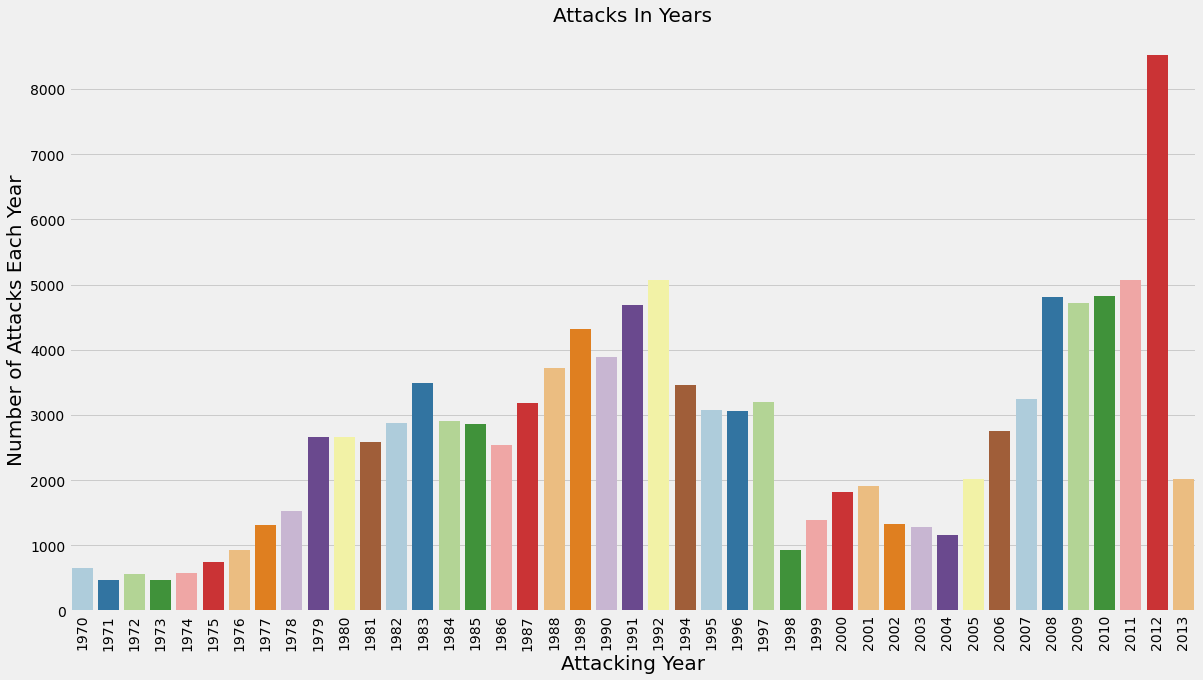

In [37]:
year = df['Year'].unique() 
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10)) 
sns.barplot(x = year, y = years_count, palette = "Paired")
plt.xticks(rotation = 90)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=20) 
plt.show()

Yearly

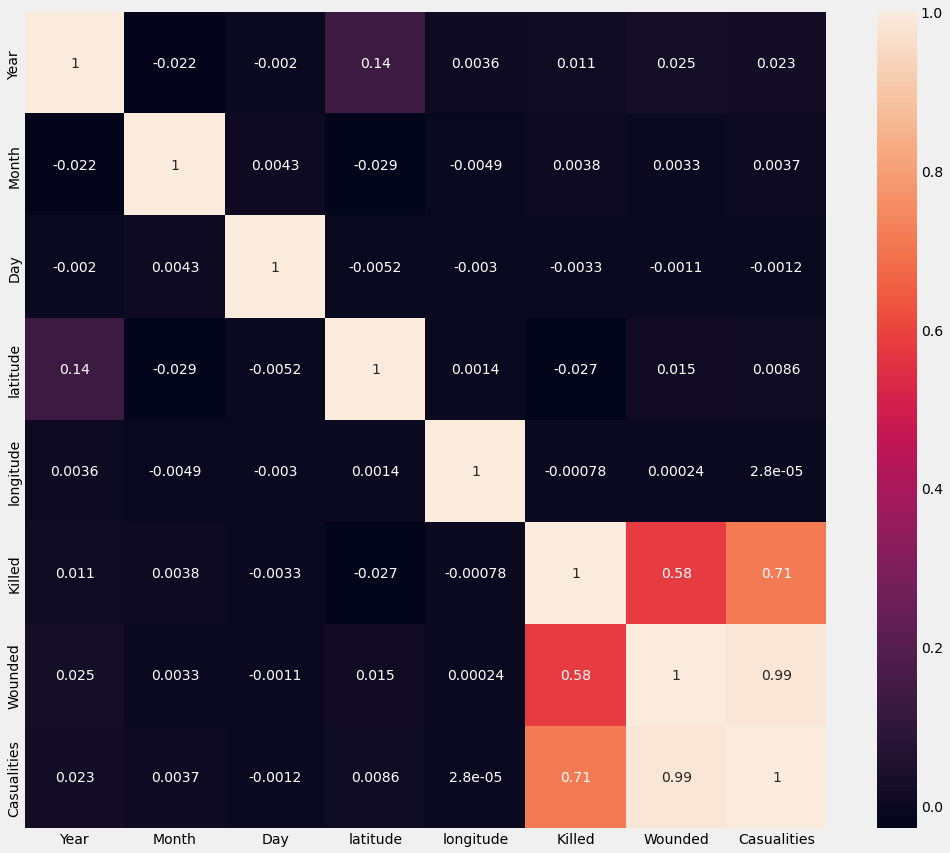

In [38]:
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df.corr(), annot= True)
plt.show()

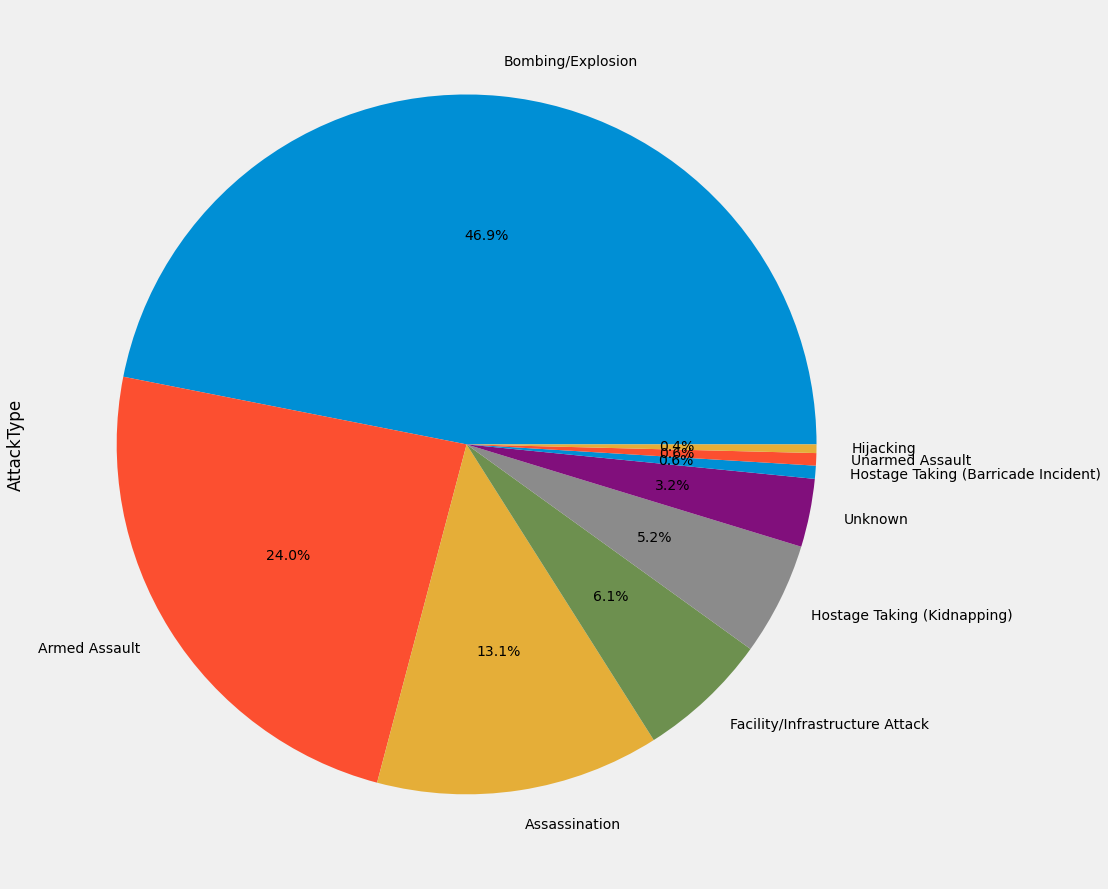

In [39]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
df['AttackType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

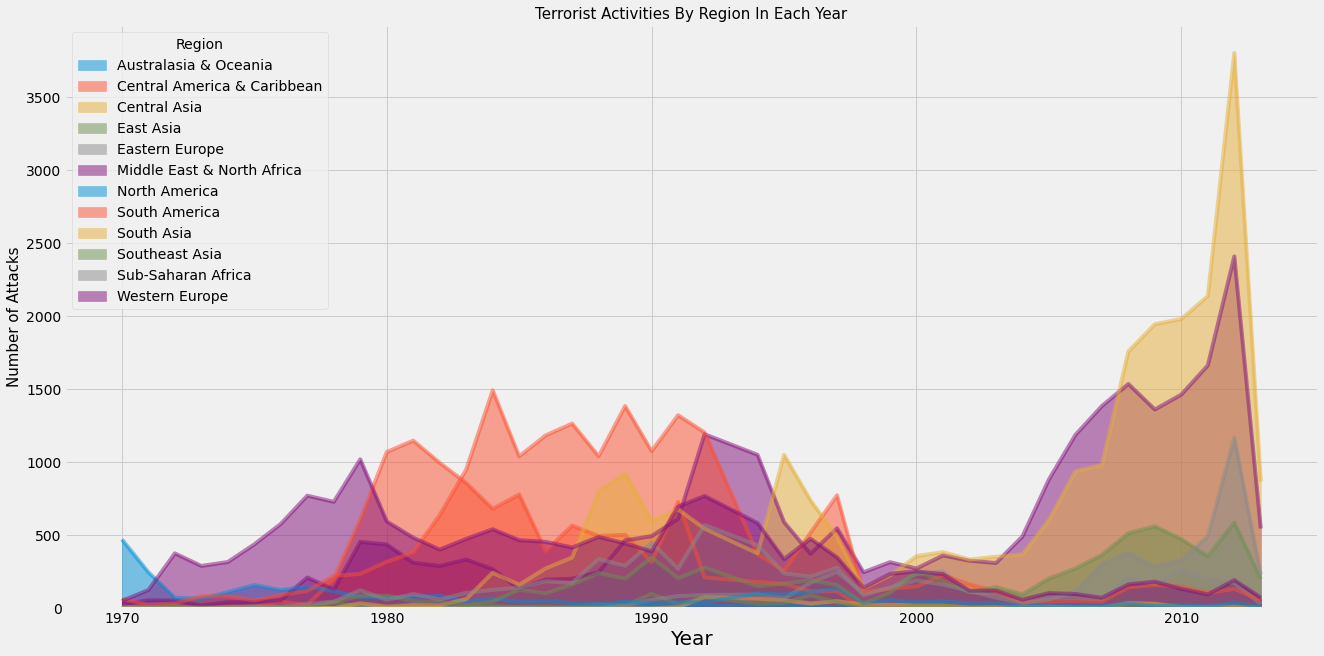

In [41]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=15) 
plt.ylabel('Number of Attacks',fontsize=15) 
plt.xlabel("Year",fontsize=20) 
plt.show()

In [45]:
df=df[['Group','Country','Killed']] 
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,Killed
0,Shining Path (SL),Peru,11570.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Taliban,Afghanistan,7621.0
4,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,5419.0
6,Al-Qaida in Iraq,Iraq,4247.0
7,Kurdistan Workers' Party (PKK),Turkey,3752.0
8,Tehrik-i-Taliban Pakistan (TTP),Pakistan,3718.0
9,New People's Army (NPA),Philippines,3572.0
